<a href="https://colab.research.google.com/github/afujii/class/blob/main/%E3%83%A9%E3%83%97%E3%83%A9%E3%82%B9%EF%BC%88%E5%81%8F%E5%BE%AE%E5%88%86%EF%BC%89%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

まず、説明のための準備として、方程式の解となる関数を表示するための方法を解説する。３Dの表示は以下の例で示す。

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

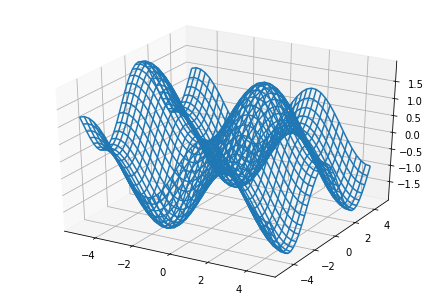

In [ ]:
#範囲と間隔の設定
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)

#メッシュ描画設定
X, Y = np.meshgrid(x, y)

#計算
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)

#プロット
ax.plot_wireframe(X,Y,Z)

plt.show()

ラプラス方程式の例題（教科書「Python による数値計算法の基礎（橋本、毛塚）森北出版」　P91　の例を示す）<br>
二次元のラプラス方程式　<br>
$ \frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} =0
$ <br> 
の解は、差分法で近似的に次のようなプログラムで計算できる。


In [ ]:
a = 10 # 一片の長さ
nx = 16
ny = 16
dx = a/nx
dy = a/ny 
phir = np.array([])

p = np.zeros((ny+1,nx+1)) # ny+1 行、　nx+1 列
x = np.linspace(0,a,nx+1)
y = np.linspace(0,a,ny+1)

for i in range(nx+1):
  phi = 1000 * np.sin(np.pi /nx * i ) # 点数は16＋1　1000倍は見やすくするだけ
  phir = np.append(phir,phi)
p[-1, :] = phir
plt.show()

格子点のポテンシャル計算

In [ ]:
a = [[ i*j for i in range(1,10)] for j in range(1,10)]
A = np.array(a)
print(A)
A[2,2]

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


9

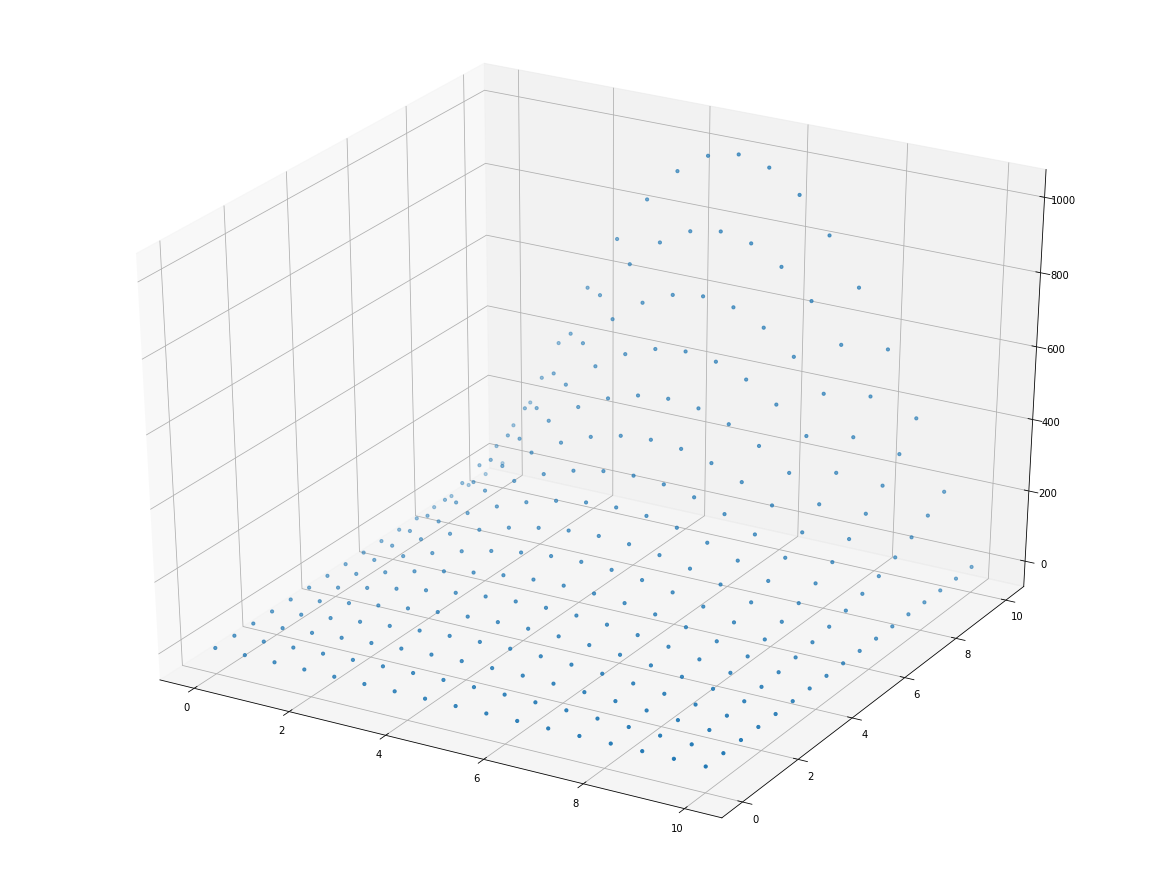

In [ ]:
target = 1e-5
l = 1

pr = np.empty_like(p)
times = []  # 繰り返し回数を調べる
poten = [] # 特定地点[2,2] のポテンシャルを計測
num = 0
while l > target:
  num += 1
  times.append(num)
  pr = p.copy() # ループの前回の値を　p に保持
  p[1:-1,1:-1] = (( dy**2*(pr[1:-1,2:] +pr[1:-1, 0:-2]) + dx**2*(pr[2:,1:-1]+pr[0:-2,1:-1]) ) /  (2*(dx**2+dy**2)))
  # ラプラス方程式のポテンシャルを近傍から近似している
  p[0,:] = 0 #　境界条件：最初の列はすべて０
  p[-1,:] = phir #　境界条件：最後の列はすべて　phir に同じ
  l = (np.sum(np.abs(p[:]) - np.abs(pr[:]))/ np.sum(np.abs(pr[:]))) # 前回との誤差を　l とする
  #print(l)
  poten.append(l)

fig = plt.figure(figsize=(16.0, 12.0))
ax = Axes3D(fig)
X,Y = np.meshgrid(x,y)
ax.scatter(X,Y,pr[:], s=10)

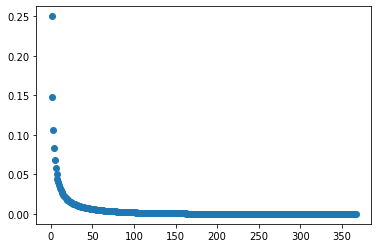

In [ ]:
plt.scatter(times,poten)